In [227]:
# Import useful packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
# import and print 10 data values only
data = pd.read_csv('~/Downloads/births.csv')
#remove na values if there 
data = data.dropna(subset = ['weight','visits'])
ndata = data[['weight','visits']]
ndata.head(10)

,weight,visits
0,6.88,13.0
1,7.69,5.0
2,8.88,12.0
3,9.00,13.0
5,8.25,12.0
6,1.63,6.0
7,5.50,9.0
8,2.69,5.0
9,8.75,13.0
10,6.50,5.0


In [205]:
#descriptive stats
print(ndata.describe())

           weight      visits
count  149.000000  149.000000
mean     7.040000   11.503356
std      1.500449    3.634713
min      1.630000    2.000000
25%      6.440000   10.000000
50%      7.310000   12.000000
75%      8.000000   14.000000
max     10.130000   19.000000


/Users/sana/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


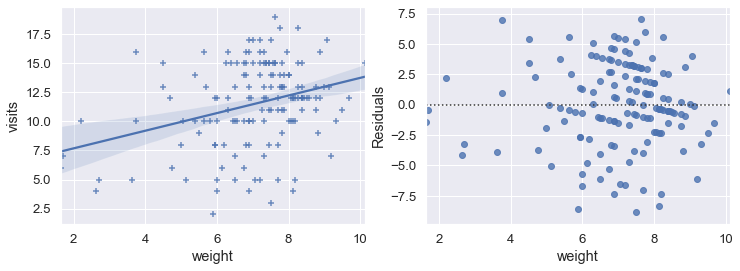

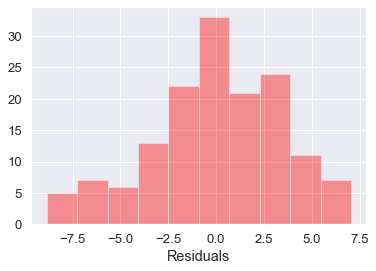

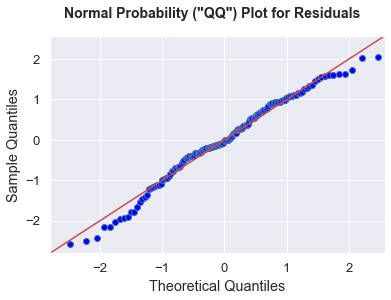

In [232]:
def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() 

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    
    # histogram
    plt.figure() 
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    
    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)
    
  #calling the function  
regression_model('weight','visits')

In [228]:
#code taken from class 2.2
#importing a useful scipy package 
from scipy import stats

#calculated using a library in appendix D 
r = 0.312

#standard deviation
sx = data["weight"].std() 
sy = data["visits"].std()

n = len(ndata)
print("number of elements=", n)

#copmputing the point-estimate for the slope
b1 = (sy/sx)*r
print("b1 =",b1)

# finding standard error in terms of the quantities above
SE = (sy/sx) * (((1-r**2)/(n-2))**0.5)
print("SE =",SE)

#finding t value for 95% where degrees of freedom is given by n-2
t = stats.t.ppf(0.975,n-2) 
print("t =",t)

#finding confidence interval 
#by adding and subtracting t multiplied by standard error 
#to the point estimate 
#To check if the confidence interval supports p value's results
lower_bound = b1 - t*SE
upper_bound = b1 + t*SE

#calculating t score using formula
t_score= (b1-0)/SE 

#calculating p value using stats library and t score 
p = (1-stats.t.cdf(t_score,n-2))*2 

#print the results
print("t score=",t_score)
print("p =",p)
print("interval =", [lower_bound,upper_bound])

number of elements= 149
b1 = 0.755793790119898
SE = 0.1898240322748886
t = 1.9762333088845878
t score= 3.98154954913936
p = 0.00010727564453882898
interval = [0.3806572147114801, 1.1309303655283158]


In [208]:
#finding pearsons correlation coefficient using stats library
stats.pearsonr(ndata['weight'],ndata['visits'])

(0.3126563993507534, 0.00010355804211300814)

In [233]:
#code taken from class 2.2 
#defining the function
def regression_model(column_x, column_y):

    # compute R-squared, and display the regression eqn
   
    
    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    
    # extract regression parameters from model, rounded to 3 decimal places:
    regressionmodel = statsmodels.OLS(Y,X).fit() #using Ordinary least squares
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)
    
    # printing the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

    #calling the function
regression_model('weight','visits')

R-squared =  0.098
Regression equation: visits =  0.757 * weight +  6.171
